<a href="https://colab.research.google.com/github/anderm18/CurlingVAR/blob/main/EDA_CurlingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Curling Data

In the last Notebook I coded up a class to parse and retrieve curling house images from an 8 hour Bonspiel video. While we were able to retrieve a lot of images from this method, it is still not nearly enough to create a full VAR model. Hopefully by the time someone reads this I've gotten some more people to help me with Data Annotation since classifying the house as empty on 1869 alone took a few hours to complete. Anyways, let's use this annotated data to do some Exploratory data analysis on the synthesized data set:

Again, all credit for the images in this dataset goes to Schenectady Curling Club, and all annotation credit I guess goes to me, Michael Anderson. Here's where you can find out more about Schenectady Curling Club:
https://schenectadycurlingclub.us/


Load in our data and annotations:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
df = pd.read_csv('/content/drive/My Drive/achilles2022_out/meta.csv')

In [4]:
df

,filename,filepath,empty
0,0.jpg,images/0.jpg,0
1,1.jpg,images/1.jpg,1
2,2.jpg,images/2.jpg,1
3,3.jpg,images/3.jpg,1
4,4.jpg,images/4.jpg,1
...,...,...,...
1865,1865.jpg,images/1865.jpg,0
1866,1866.jpg,images/1866.jpg,0
1867,1867.jpg,images/1867.jpg,1
1868,1868.jpg,images/1868.jpg,0


We can see that there are 1,869 unique images in the dataset

In [5]:
print("Number of empty Houses:", len(df[df['empty'] == 1]))
print("Number of full Houses:", len(df[df['empty'] == 0]))

Number of empty Houses: 1230
Number of full Houses: 640


In [12]:
full_houses = df[df['empty'] == 0]
empty_houses = df[df['empty'] == 1]

full_houses.head()

,filename,filepath,empty
0,0.jpg,images/0.jpg,0
11,11.jpg,images/11.jpg,0
13,13.jpg,images/13.jpg,0
14,14.jpg,images/14.jpg,0
17,17.jpg,images/17.jpg,0


This dataset is quite simple, but there are a lot of other things we need to consider before making a model. The first, is which color scale we want the image in. Grayscale is ideal, but I'm afraid of how the colors of the houses will affect how visible the pixels on the stones are:

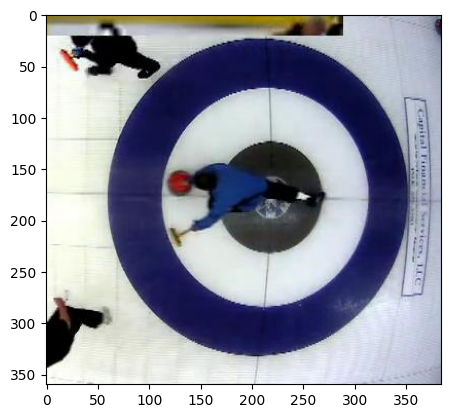

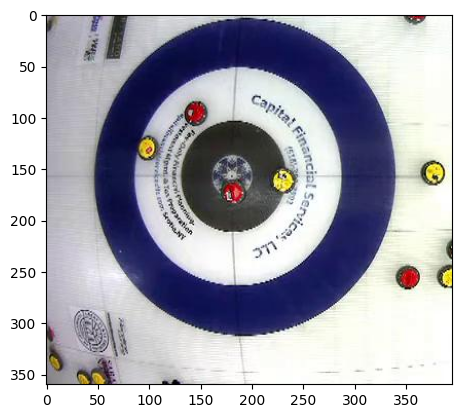

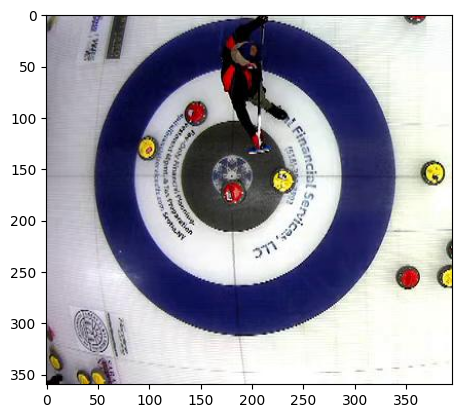

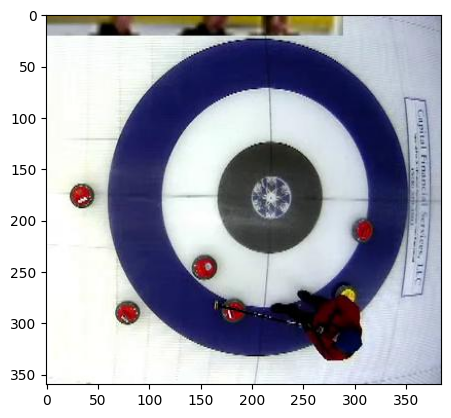

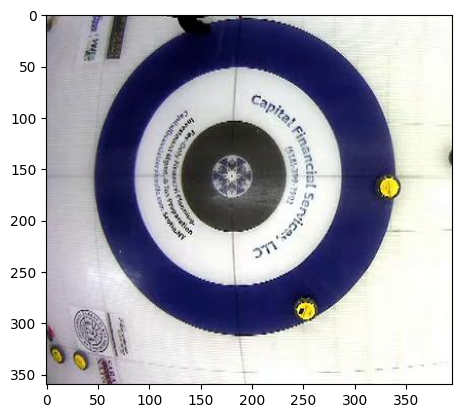

In [14]:
for i in full_houses.head()['filepath']:
    img = Image.open(f"/content/drive/My Drive/achilles2022_out/{i}")
    plt.imshow(img)
    plt.show()

We should take note that many of the full houses include people in them (the skips). We may need to run Faster-RCNN or YOLOv5 to detect if a person is in the image to filter them out, though im worried this will make our dataset too small to work with. For now, I'm going to ignore it.

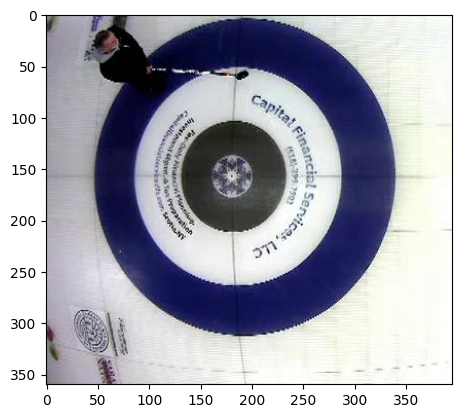

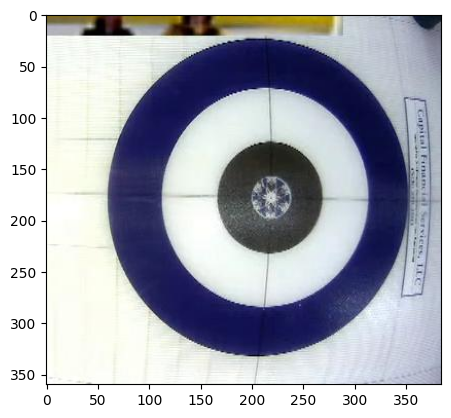

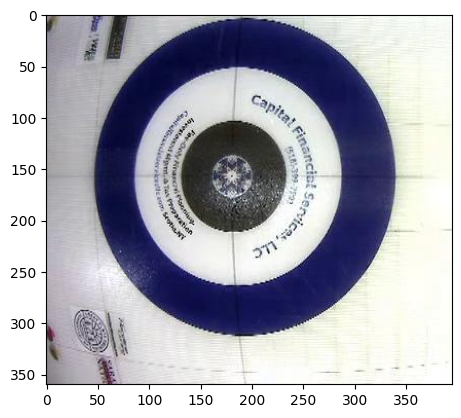

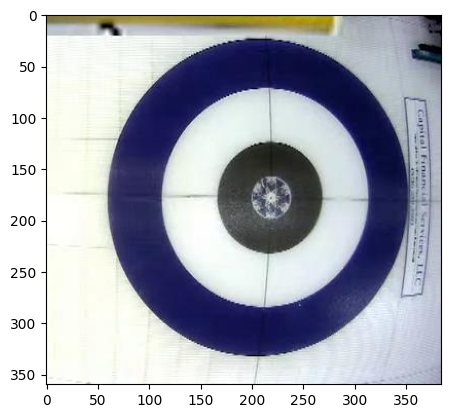

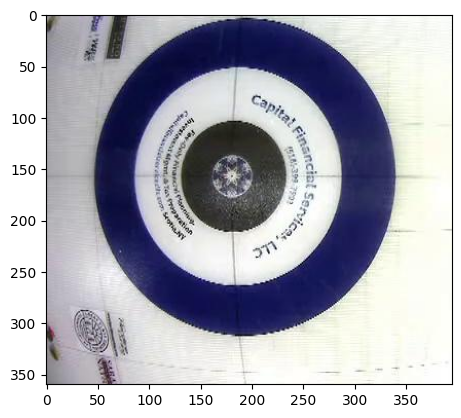

In [15]:
for i in empty_houses.head()['filepath']:
    img = Image.open(f"/content/drive/My Drive/achilles2022_out/{i}")
    plt.imshow(img)
    plt.show()

The person in image one reminds us that the empty houses also may have sweepers in them, meaning the issue brought up by the existence of people may not be a big deal after all.

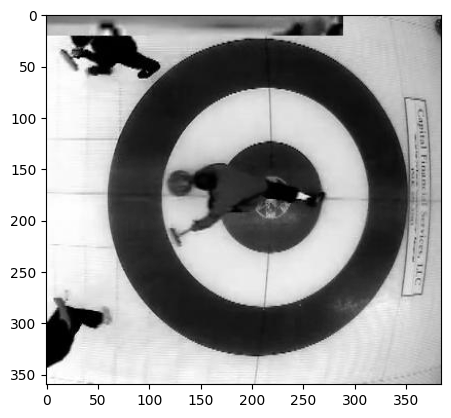

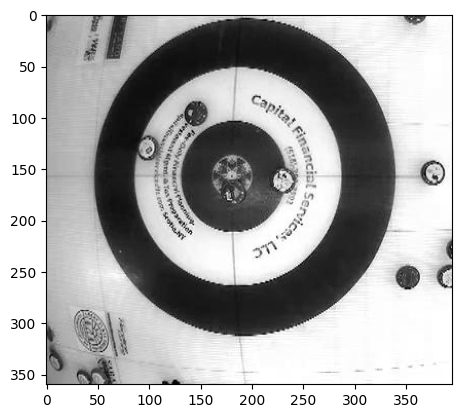

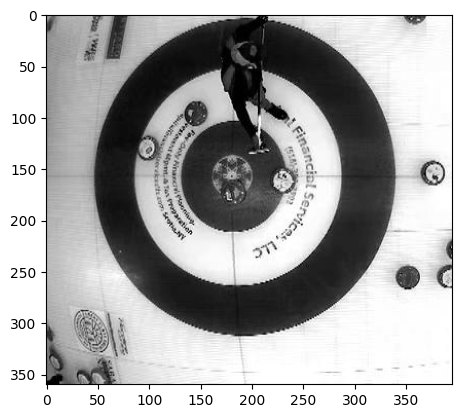

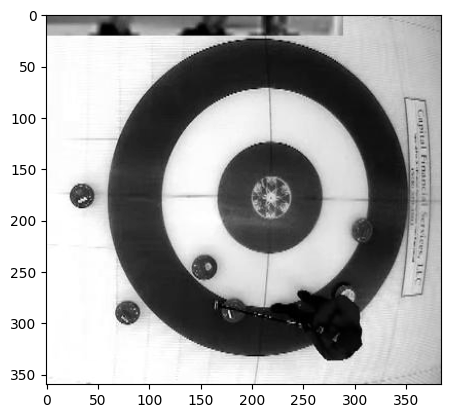

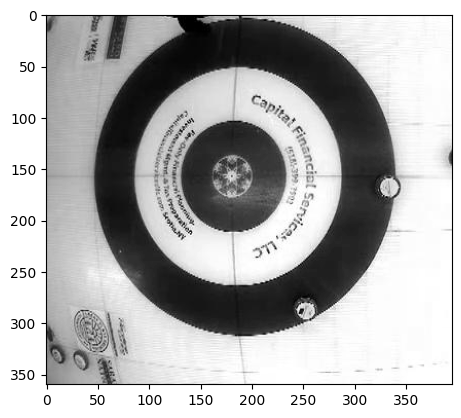

In [17]:
for i in full_houses.head()['filepath']:
    img = Image.open(f"/content/drive/My Drive/achilles2022_out/{i}")
    img_gray = img.convert('L')
    plt.imshow(img_gray, cmap='gray')
    plt.show()

This luckily looks useable. The white ice really makes the rocks more clear, which is great for a model!!

This turned out to be a lot less EDA than I had thought, but this data seems pretty clean as is! There's definitely more to be done here to better understand the dataset, but for now I'm going to cut it here.